In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from ipywidgets import interact

In [75]:
# Load olympic data in csv
athelete_df = pd.read_csv("Raw Data/athlete_events.csv")
athelete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [76]:
# Load country information in csv
NOC_df = pd.read_csv("Raw Data/noc_regions.csv")
NOC_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [77]:
# Merge the dataframes
athelete_merged_df = pd.merge(athelete_df,NOC_df,on='NOC',how='left')
athelete_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [78]:
# Data cleanup
athelete_merged_df['Medal'].fillna('DNW', inplace = True)
athelete_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [79]:
athelete_merged_df.replace('USA', "United States of America", inplace = True)
athelete_merged_df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
athelete_merged_df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
athelete_merged_df.replace('Congo', "Republic of the Congo", inplace = True)
athelete_merged_df.replace('Lao', "Laos", inplace = True)
athelete_merged_df.replace('Syrian Arab Republic', "Syria", inplace = True)
athelete_merged_df.replace('Serbia', "Republic of Serbia", inplace = True)
athelete_merged_df.replace('Czechia', "Czech Republic", inplace = True)
athelete_merged_df.replace('UAE', "United Arab Emirates", inplace = True)
athelete_merged_df.replace('UK', "United Kingdom", inplace = True)

In [80]:
athelete_merged_df[['region','Team','NOC']]

,region,Team,NOC
0,China,China,CHN
1,China,China,CHN
2,Denmark,Denmark,DEN
3,Denmark,Denmark/Sweden,DEN
4,Netherlands,Netherlands,NED
...,...,...,...
271111,Poland,Poland-1,POL
271112,Poland,Poland,POL
271113,Poland,Poland,POL
271114,Poland,Poland,POL


In [81]:
# Function to map country to city

def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis" or col=="Lake Placid" or col=="Salt Lake City" or col=="Squaw Valley":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva" or col=="Sochi":
        return  "Russia"
    elif col == "Montreal" or col == "Calgary" or col=="Vancouver":
        return  "Canada"
    elif col == "Munich" or col == "Berlin" or col=="Garmisch-Partenkirchen":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo" or col=="Nagano" or col=="Sapporo":
        return  "Japan"
    elif col == "Roma" or col=="Cortina d'Ampezzo" or col=="Torino":
        return  "Italy"
    elif col == "Paris" or col=="Albertville" or col == "Chamonix" or col=="Grenoble":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    elif col == "Innsbruck":
        return  "Austria"
    elif col == "Lillehammer" or col=="Oslo":
        return  "Norway"
    elif col == "Sankt Moritz":
        return  "Switzerland"
    else:
        return "Other"


# Applying this function

athelete_merged_df['Host_Country'] = athelete_merged_df['City'].apply(host_country)

In [82]:
# Medal Winners for Summer games
athelete_merged_df = athelete_merged_df[(athelete_merged_df['Medal']!='DNW') & (athelete_merged_df['Season']!='Summer')]

In [83]:
athelete_merged_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN,Russia
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN,France
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway,NaN,France
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,Norway,NaN,Norway
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,Norway,NaN,Norway


In [85]:
host_country_df = athelete_merged_df.groupby(['Host_Country','Year','region'])['Medal'].count().reset_index(name='Medal_Count')
host_country_df

,Host_Country,Year,region,Medal_Count
0,Austria,1964,Austria,17
1,Austria,1964,Canada,7
2,Austria,1964,Czech Republic,17
3,Austria,1964,Finland,15
4,Austria,1964,France,7
...,...,...,...,...
371,United States of America,2002,South Korea,7
372,United States of America,2002,Sweden,26
373,United States of America,2002,Switzerland,24
374,United States of America,2002,United Kingdom,6


In [86]:
# performance of USA
USA_df = host_country_df[host_country_df['region'] =='United States of America']
USA_df.head()

,Host_Country,Year,region,Medal_Count
13,Austria,1964,United States of America,8
28,Austria,1976,United States of America,11
44,Canada,1988,United States of America,7
70,Canada,2010,United States of America,97
83,France,1924,United States of America,12
97,France,1968,United States of America,7
117,France,1992,United States of America,14
128,Germany,1936,United States of America,16
141,Italy,1956,United States of America,26
167,Italy,2006,United States of America,52


In [90]:
# USA as host
USA_host_df = host_country_df[(host_country_df['region'] =='United States of America') & (host_country_df['Host_Country'] =='United States of America')]
USA_host_df

,Host_Country,Year,region,Medal_Count
319,United States of America,1932,United States of America,34
333,United States of America,1960,United States of America,27
351,United States of America,1980,United States of America,30
375,United States of America,2002,United States of America,84


In [87]:
medals_per_year = athelete_merged_df.groupby('Year')['Year'].value_counts().reset_index()
medals_per_year.head()

,Year,count
0,1924,130
1,1928,89
2,1932,92
3,1936,108
4,1948,135


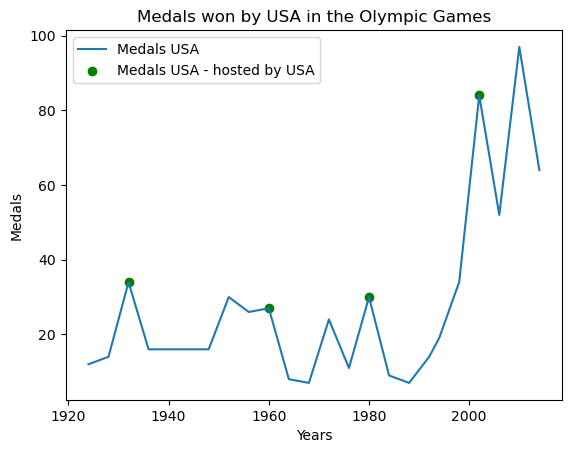

In [101]:
# Sort dataframes
USA_sorted_df = USA_df.sort_values(by='Year')
# Plot for Medals by Years
#plt.bar(medals_per_year['Year'], medals_per_year['count'],  label='Total Medals')
plt.plot(USA_sorted_df['Year'], USA_sorted_df['Medal_Count'], label='Medals USA')
plt.scatter(USA_host_df['Year'], USA_host_df['Medal_Count'], c='g', label='Medals USA - hosted by USA')
# Title and Axis
plt.title('Medals won by USA in the Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [103]:
host_country_medals_df = host_country_df[host_country_df['Host_Country']==host_country_df['region']]

,Host_Country,Year,region,Medal_Count
0,Austria,1964,Austria,17
14,Austria,1976,Austria,7
30,Canada,1988,Canada,6
48,Canada,2010,Canada,90
76,France,1924,France,10
88,France,1968,France,9
103,France,1992,France,12
122,Germany,1936,Germany,7
134,Italy,1956,Italy,8
154,Italy,2006,Italy,25


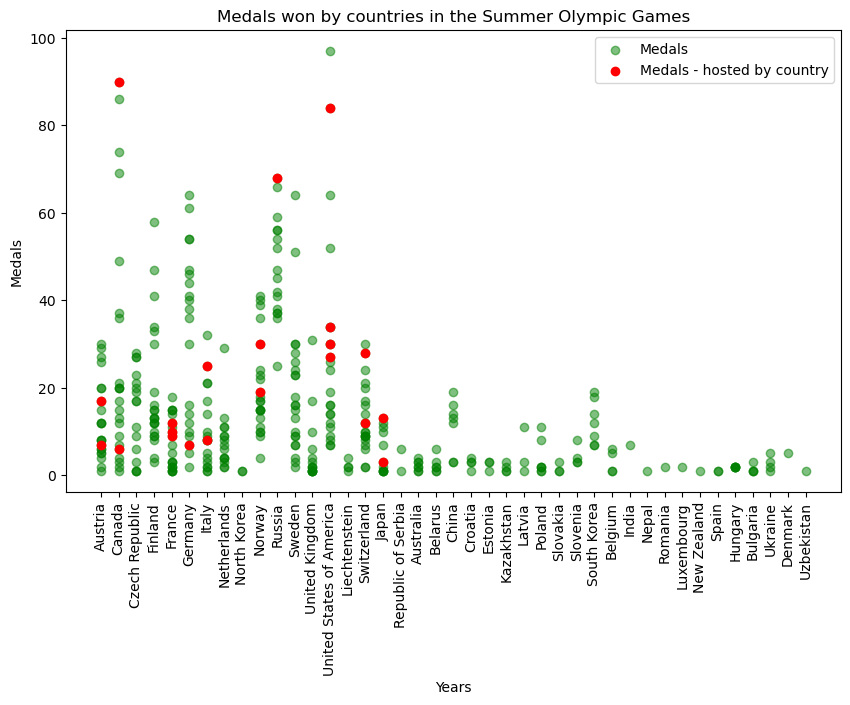

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(host_country_df['region'], host_country_df['Medal_Count'], c='g',alpha=0.5, label='Medals')
plt.scatter(host_country_medals_df['region'], host_country_medals_df['Medal_Count'], c='r',alpha=1.0, label='Medals - hosted by country')
plt.title('Medals won by countries in the Summer Olympic Games')
plt.xlabel('Country')
plt.ylabel('Medals')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()